In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../csvs/bank-loan.csv")
dataset.head(3)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40,1.0,15.0,14.0,55.0,5.5,0.856075,NaN,0.0


In [3]:
dataset.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,847.000000,835.000000,845.000000,840.000000,842.000000,838.000000,827.000000,700.000000
mean,35.029412,1.711924,8.574850,8.357396,46.707143,10.166983,1.581671,3.080809,0.261429
std,8.041432,0.928731,6.787285,6.878780,38.531877,6.722295,2.126653,3.424017,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.384926,1.043060,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.886456,2.001340,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.000000,13.800000,1.900935,3.890321,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [4]:
# sns.boxplot(data = dataset, x ="debtinc")
dataset.isnull().sum()
dataset["debtinc"].fillna(dataset["debtinc"].mean(), inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_7856\2681920827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["debtinc"].fillna(dataset["debtinc"].mean(), inplace=True)


In [5]:
dataset.isnull().sum()

age           0
ed            3
employ       15
address       5
income       10
debtinc       0
creddebt     12
othdebt      23
default     150
dtype: int64

In [6]:
# sns.boxplot(data=dataset, x="debtinc")
dataset.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,847.000000,835.000000,845.000000,840.000000,850.000000,838.000000,827.000000,700.000000
mean,35.029412,1.711924,8.574850,8.357396,46.707143,10.166983,1.581671,3.080809,0.261429
std,8.041432,0.928731,6.787285,6.878780,38.531877,6.690549,2.126653,3.424017,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.125000,0.384926,1.043060,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.850000,0.886456,2.001340,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.000000,13.775000,1.900935,3.890321,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [7]:
dataset.shape

(850, 9)

In [8]:
q1 = dataset["debtinc"].quantile(0.25)
q3 = dataset["debtinc"].quantile(0.75)
# q1
q3

13.775

In [9]:
IQR = q3 - q1
IQR

8.65

In [10]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

min_range, max_range

(-7.850000000000001, 26.75)

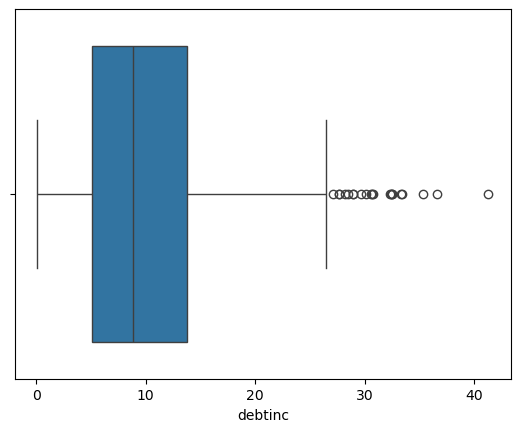

<Figure size 5000x2500 with 0 Axes>

In [14]:
sns.boxplot(data=dataset, x= "debtinc")
plt.figure(figsize=(50,25))
plt.show()

<Axes: xlabel='debtinc'>

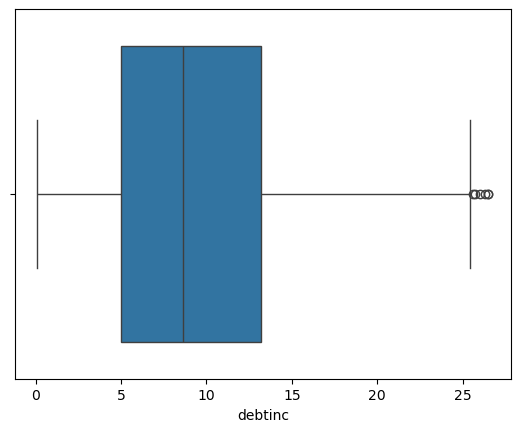

In [13]:
newDataset = dataset[dataset["debtinc"] < max_range]
newDataset.shape
sns.boxplot(data= newDataset, x="debtinc")